In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-prices-prediction-data/CarPricesPrediction.csv


In [2]:
#firstly i am going to install the necesary libraries that i am going to use later on 
!pip install numpy pandas matplotlib scikit-learn tensorflow 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

2024-08-09 01:18:43.740102: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 01:18:43.740230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 01:18:43.896825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
#now i am going to import the data from the dataset and load it 
url="https://www.kaggle.com/datasets/mrsimple07/car-prices-prediction-data"
data=pd.read_csv('/kaggle/input/car-prices-prediction-data/CarPricesPrediction.csv')

In [5]:
#now displaying the first few rows of the dataset 
print(data.head())

   Unnamed: 0       Make      Model  Year  Mileage  Condition     Price
0           0       Ford  Silverado  2022    18107  Excellent  19094.75
1           1     Toyota  Silverado  2014    13578  Excellent  27321.10
2           2  Chevrolet      Civic  2016    46054       Good  23697.30
3           3       Ford      Civic  2022    34981  Excellent  18251.05
4           4  Chevrolet      Civic  2019    63565  Excellent  19821.85


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


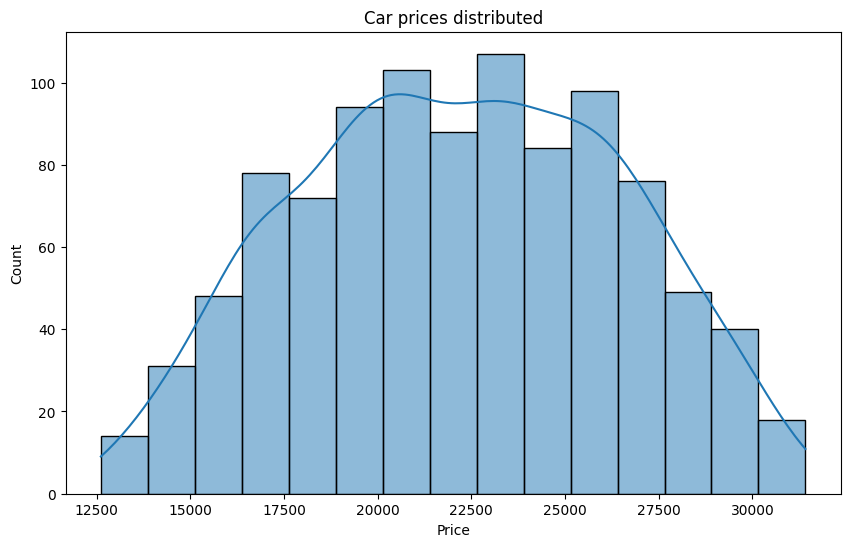

In [6]:
#visualizing the distribution of the car prices
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Car prices distributed')
plt.show()

In [7]:
#dropping the missing values(getting read of the empty spots)
data = data.dropna()

In [8]:
#converting the categorical variables into numerical 
data=pd.get_dummies(data)

In [9]:
#splitting into x and y(separate features and target variable)
X=data.drop('Price', axis=1)
y=data['Price']

In [10]:
#now i am splitting to test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#linear regression model
#initialization of it
lr_model = LinearRegression()
#training thre model
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
#making predicitions
y_pred_lr = lr_model.predict(X_test)
#model evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")

Linear Regression Mean Squared Error: 0.0047774769462206835


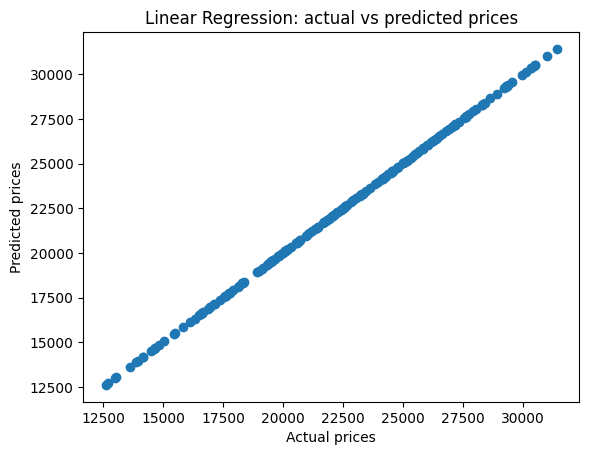

In [13]:
#plot
#actual vs predicted prices
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Linear Regression: actual vs predicted prices')
plt.show()

In [14]:
#neural networks model
#i am using tensorflow and keras for this one
#starting with the normalization of hte data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
#building the nnm
nn_model=Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

In [16]:
#compile
nn_model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#training the model
history=nn_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)
#making predicitons
y_pred_nn=nn_model.predict(X_test_scaled)

Epoch 1/50
20/20 [==============================] - 1s 11ms/step - loss: 512486976.0000 - val_loss: 492702912.0000
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 512391072.0000 - val_loss: 492585664.0000
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 512230752.0000 - val_loss: 492388864.0000
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 511968928.0000 - val_loss: 492082016.0000
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 511575136.0000 - val_loss: 491633344.0000
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 511005696.0000 - val_loss: 491005440.0000
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 510224640.0000 - val_loss: 490150720.0000
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 509170592.0000 - val_loss: 489035520.0000
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 507815584.0000 

In [18]:
#model evaluation
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn}")

Neural Network Mean Squared Error: 82769733.34321511


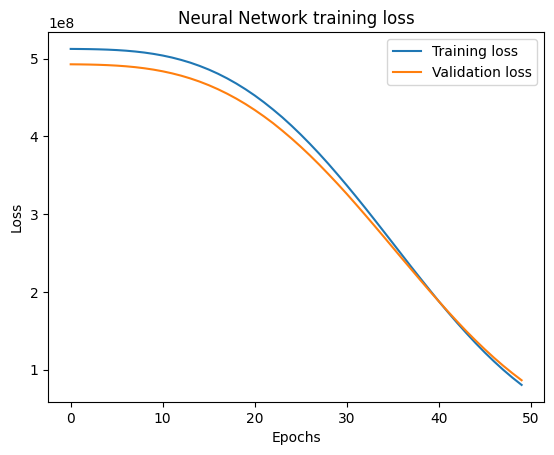

In [19]:
#plot
#training loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network training loss')
plt.legend()
plt.show()